In [ ]:
import pandas as pd
import numpy as np

# Connecting to Google Drive and making dataframes

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
data_dir = "/content/drive/My Drive/ML_Data"

train = f"{data_dir}/train.csv"
train_df = pd.read_csv(train)


Mounted at /content/drive/


In [ ]:

df = train_df
df = df.drop(['rating_num','row_id'], axis =1)
for column in df.select_dtypes('float64').columns.to_list():
    if df[column].isnull().sum()/len(df) == 1:
        df = df.drop(column,axis=1)

for column in df.select_dtypes('float64').columns.to_list():
    if df[column].isnull().sum() != 0:
        df[column] = df[column].fillna(df[column].mean())

df

,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,13,winner,team1,8,7.000000,7.000000,0.317073,0.48,0.0,0,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,16,loser,team2,8,3.000000,9.000000,0.463415,0.42,0.0,0,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,loser,team1,5,11.000000,11.000000,0.682927,0.44,0.0,0,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,13,loser,team2,4,17.000000,17.000000,0.682927,0.58,0.0,0,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,11,draw,team1,5,10.000000,10.000000,0.731707,0.70,0.0,0,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20448,14,draw,team2,14,7.609481,8.012612,0.439024,0.26,0.0,0,...,0.350022,0.179766,0.253738,0.582760,0.480930,0.497442,0.113251,0.424523,0.420103,0.333038
20449,3,winner,team2,11,4.000000,4.000000,0.390244,0.32,0.0,0,...,0.362193,0.240326,0.369752,0.438649,0.381099,0.264074,0.171927,0.422975,0.588501,0.534694
20450,4,loser,team1,7,5.000000,5.000000,0.268293,0.30,0.0,0,...,0.341322,0.248870,0.240096,0.515025,0.694587,0.869000,0.296820,0.511550,0.548315,0.385927
20451,13,loser,team1,8,5.000000,5.000000,0.463415,0.46,0.0,0,...,0.215831,0.190395,0.207007,0.631279,0.330606,0.322158,0.108018,0.333229,0.349177,0.458685


# Data Preprocessing
    1) data-dist: Array of prefixes for various features. For Example 'player_general_var' is a prefix to features= player_general_var_1, player_general_var_2,.
    2) Plotted Density plots to find Skewness and multimodality for features represented as prefixis.
    3) Normalization(see Quantile Transformation)
    4) Label Encodding (see Label Encoder)


In [ ]:
data_dist = ['player_general_var', 'player_general_derived_var','player_defensive_ratio_var','player_defensive_derived_var','player_offensive_derived_var','player_offensive_ratio_var','team1_offensive_ratio_var','team1_offensive_derived_var','team2_offensive_ratio_var','team2_offensive_derived_var','player_physical_derived_var','player_general_raw_var','player_defensive_raw_var','player_offensive_raw_var','team1_offensive_raw_var','team1_defensive_raw_var','team2_offensive_raw_var','team2_defensive_raw_var']

In [ ]:
import pandas as pd

# Loop over the prefixes in data_dist
for pre in data_dist:
    # Find all column names that start with the prefix
    cols = [x for x in df.columns.to_list() if x.startswith(pre)]
    # Store the list of column names in a variable named after the prefix
    globals()[pre] = cols

player_general_var - Skewness: 4.00, Multimodal: False
player_general_derived_var - Skewness: 0.24, Multimodal: True
player_defensive_ratio_var - Skewness: 1.15, Multimodal: False
player_defensive_derived_var - Skewness: 1.25, Multimodal: False
player_offensive_derived_var - Skewness: 1.34, Multimodal: False
player_offensive_ratio_var - Skewness: 0.01, Multimodal: True
team1_offensive_ratio_var - Skewness: 0.51, Multimodal: True
team1_offensive_derived_var - Skewness: 0.53, Multimodal: True
team2_offensive_ratio_var - Skewness: 0.58, Multimodal: True
team2_offensive_derived_var - Skewness: 0.58, Multimodal: True
player_physical_derived_var - Skewness: 0.20, Multimodal: True
player_general_raw_var - Skewness: 1.68, Multimodal: False
player_defensive_raw_var - Skewness: 2.86, Multimodal: False
player_offensive_raw_var - Skewness: 2.64, Multimodal: False
team1_offensive_raw_var - Skewness: 0.76, Multimodal: True
team1_defensive_raw_var - Skewness: 0.96, Multimodal: True
team2_offensive_ra

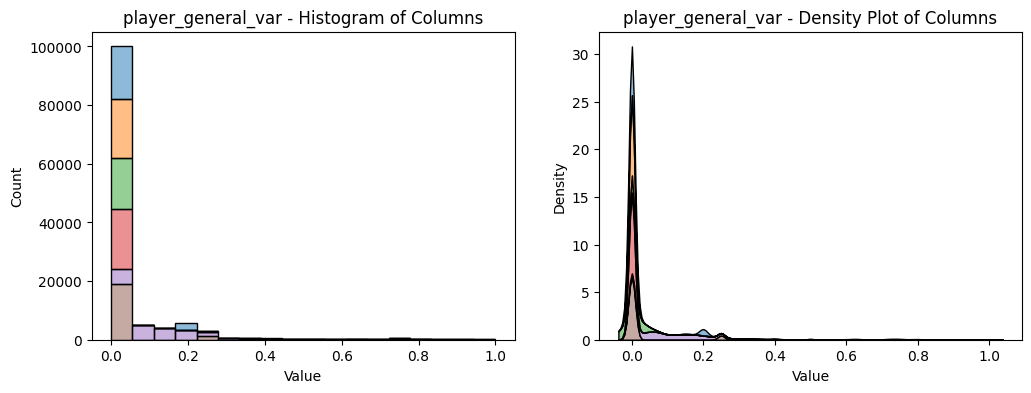

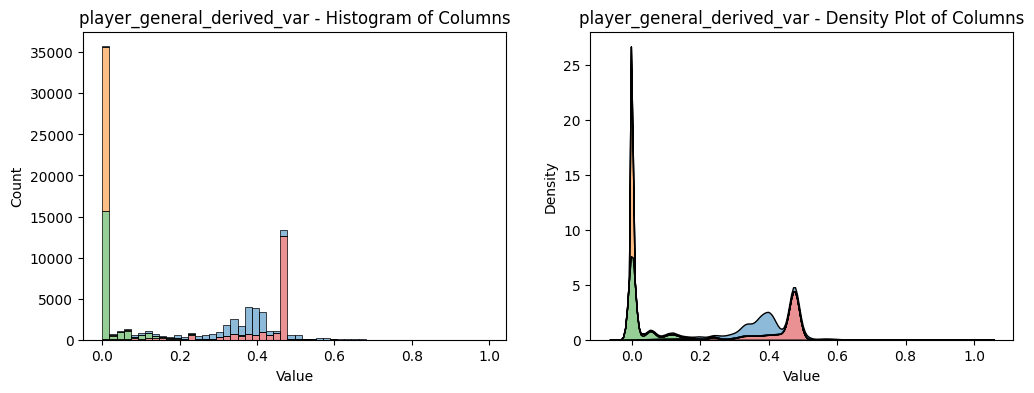

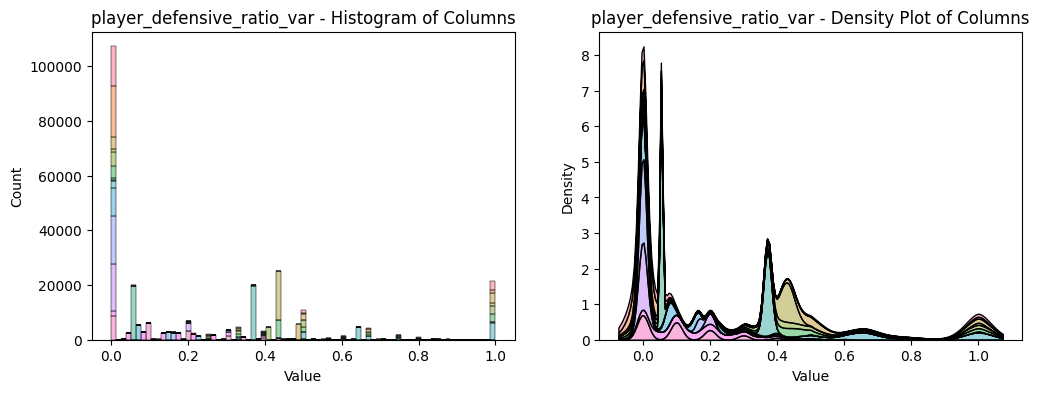

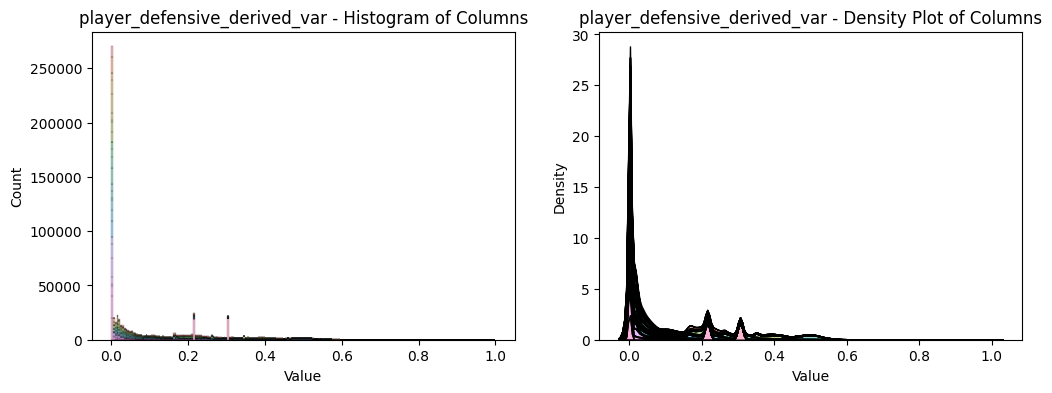

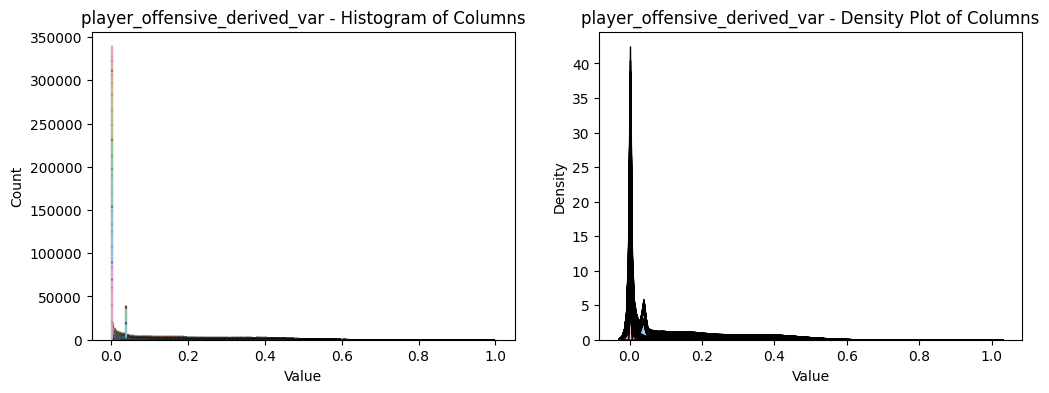

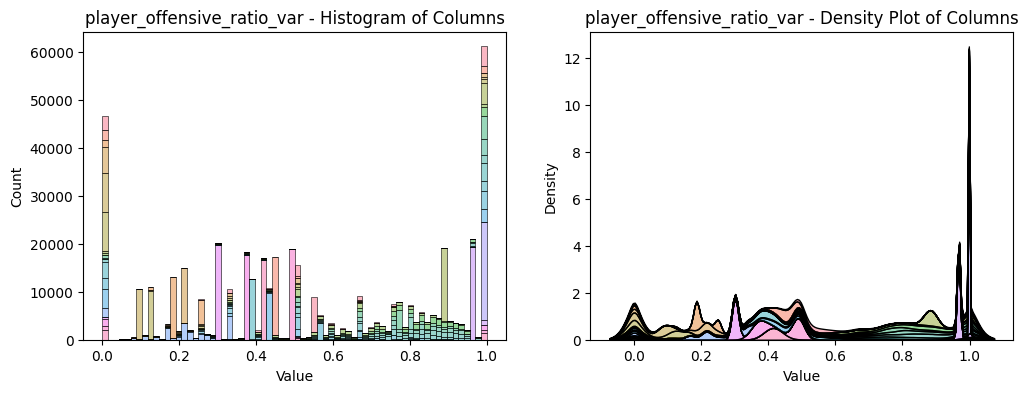

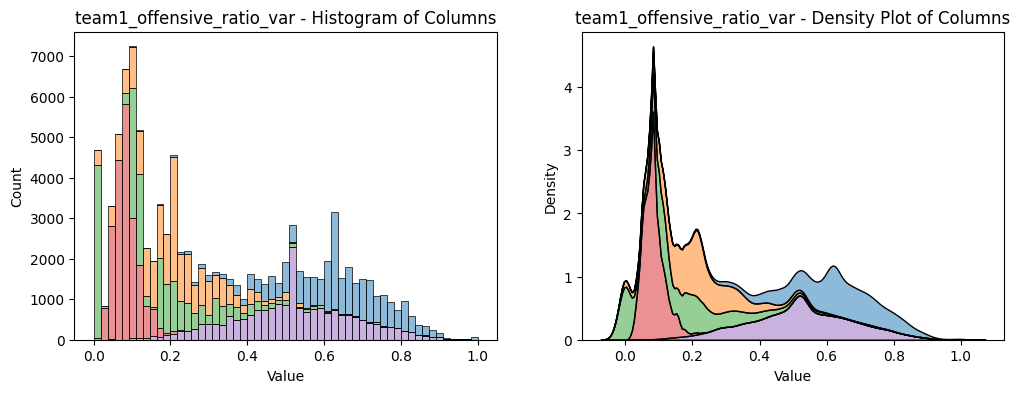

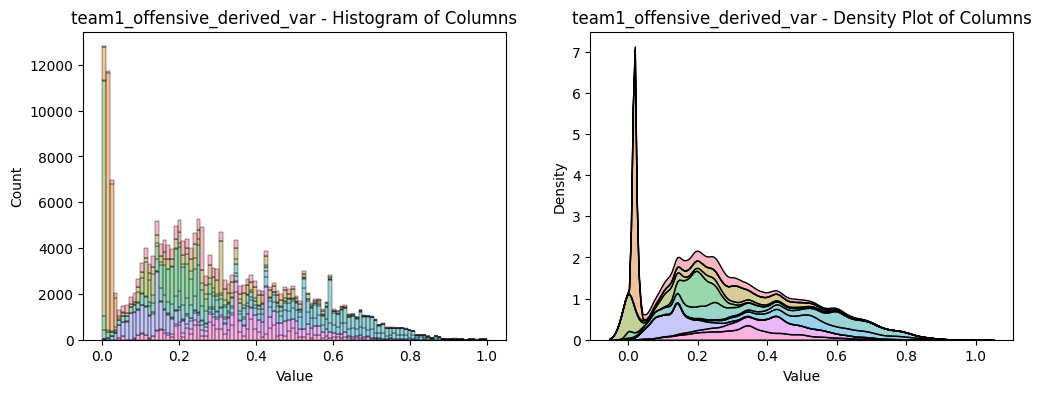

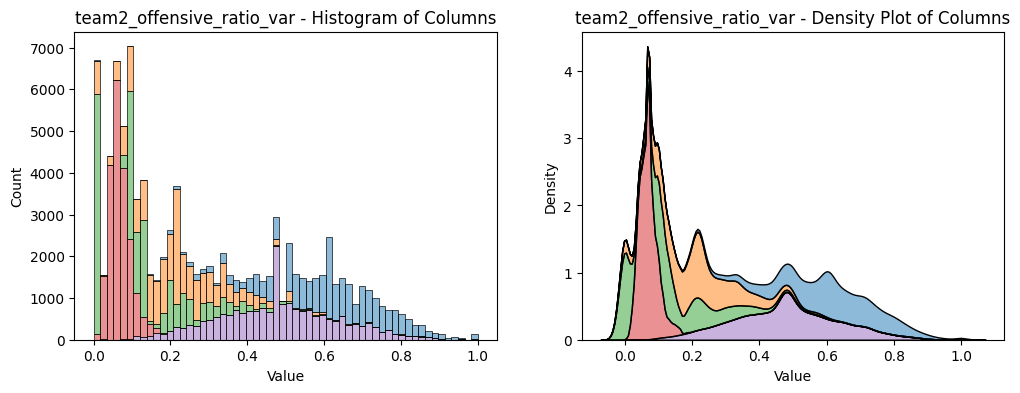

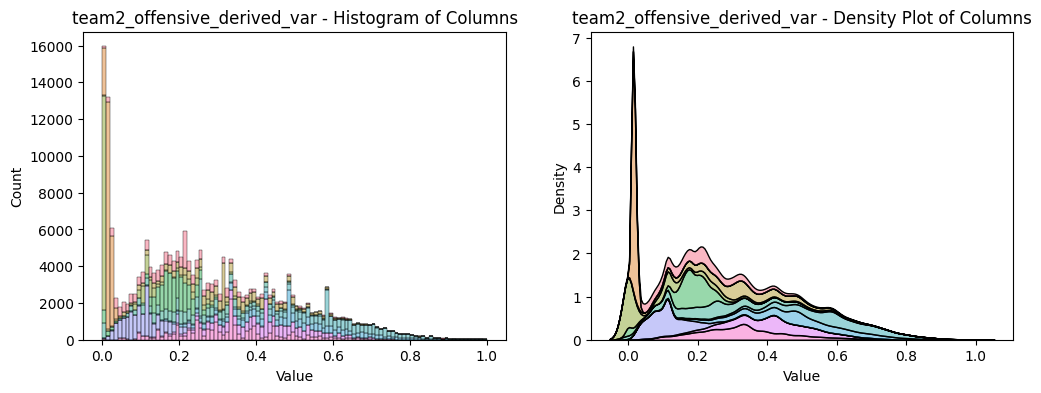

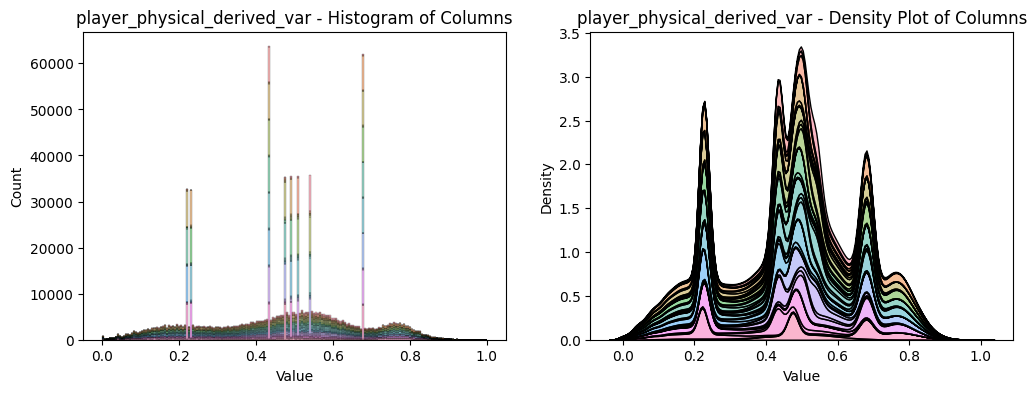

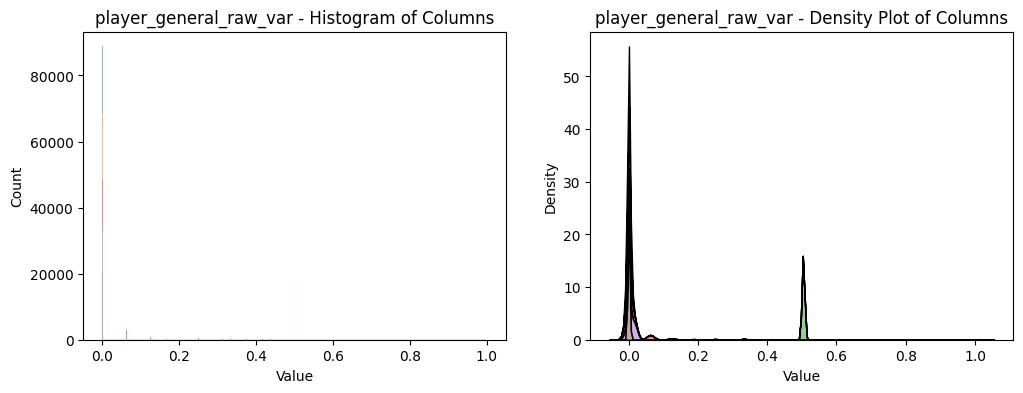

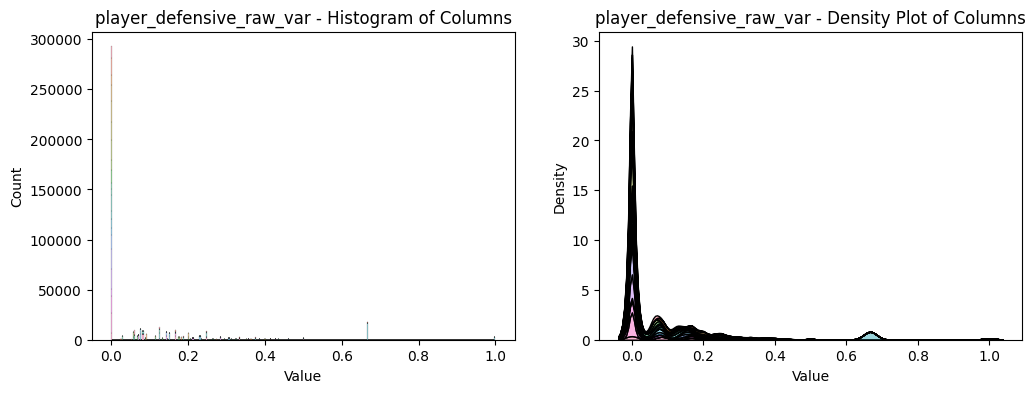

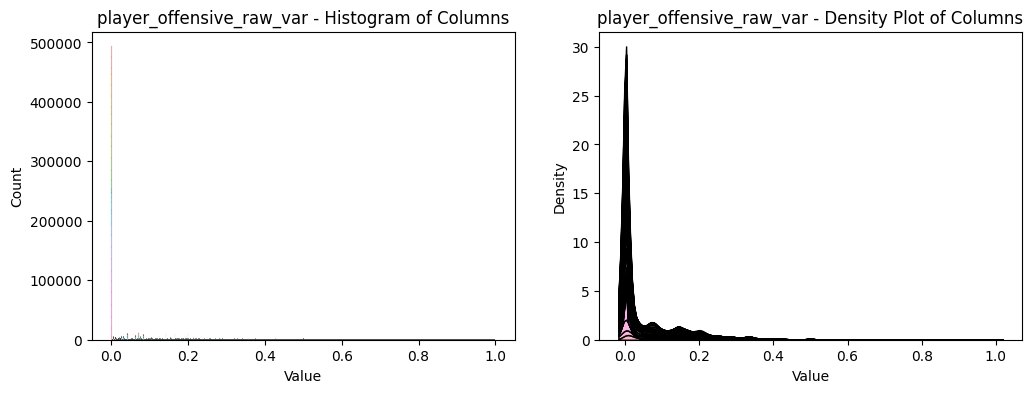

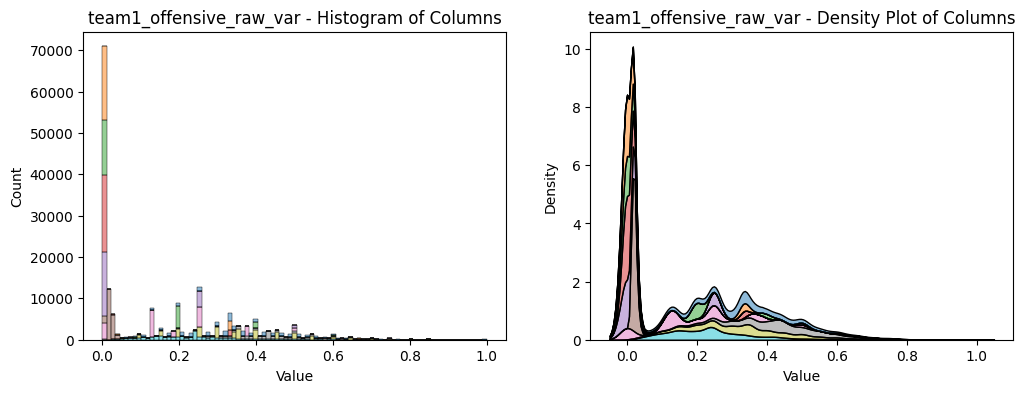

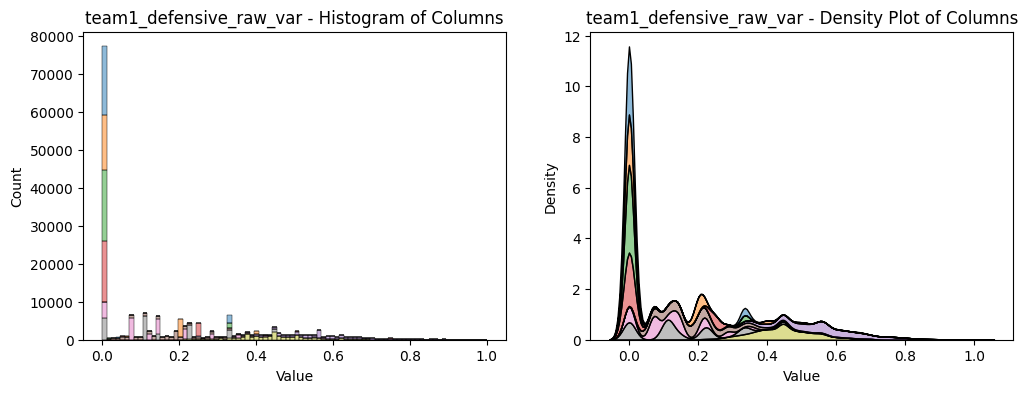

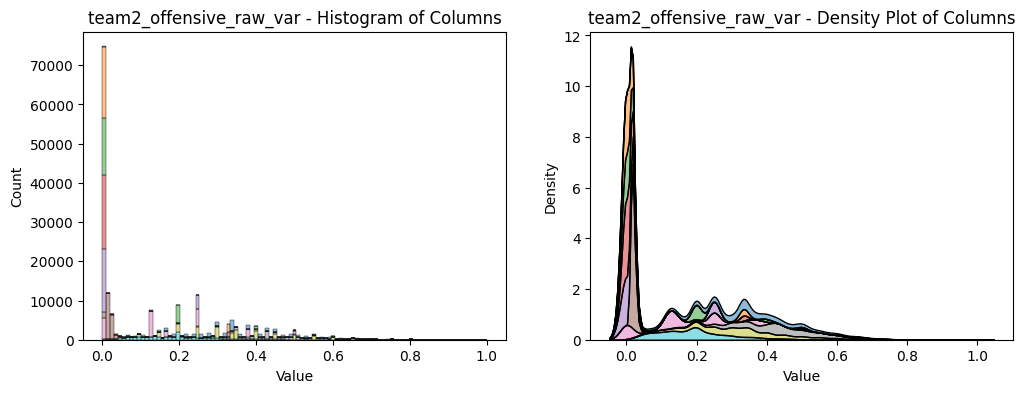

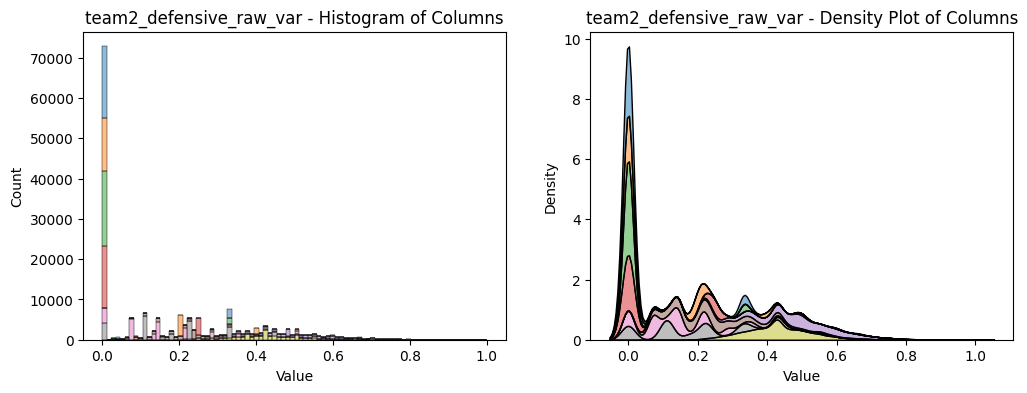

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Loop over the prefixes in data_dist
for pre in data_dist:
    # Find all column names that start with the prefix
    cols = [x for x in df.columns.to_list() if x.startswith(pre)]
    if len(cols) == 0:
        continue

    # Subset the data
    subset = df[cols]

    # Plot the distribution of the columns in a single graph
    fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
    sns.histplot(subset, kde=False, ax=axs[0], alpha=0.5, multiple="stack", legend=False)
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Count')
    axs[0].set_title(f'{pre} - Histogram of Columns')

    # Add density plot
    sns.kdeplot(subset, ax=axs[1], alpha=0.5, multiple="stack", legend=False)
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Density')
    axs[1].set_title(f'{pre} - Density Plot of Columns')

    # Test for skewness and multimodality of the group
    s = skew(subset.stack())
    k = kurtosis(subset.stack())
    multimodal = k < 0

    # Print the results
    print(f'{pre} - Skewness: {np.abs(s):.2f}, Multimodal: {multimodal}')


### Quantile Tranformation

For column with prefix as Derived and Ratio we normalized them by using Quantile Transformer.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html


In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_general_var')]
for column in l1:
    qt1 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt1.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_general_derived_var')]
for column in l1:
    qt2 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt2.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_defensive_ratio_var')]
for column in l1:
    qt3 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt3.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_defensive_derived_var')]
for column in l1:
    qt4 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt4.fit_transform(df[column].values.reshape(-1,1))


In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_offensive_derived_var')]
for column in l1:
    qt5 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt5.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_offensive_ratio_var')]
for column in l1:
    qt5 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt5.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('team1_offensive_ratio_var')]
for column in l1:
    qt6 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt6.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('team1_offensive_derived_var')]
for column in l1:
    qt7 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt7.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('team2_offensive_ratio_var')]
for column in l1:
    qt8 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt8.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('team2_offensive_derived_var')]
for column in l1:
    qt9 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt9.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_physical_derived_var')]
for column in l1:
    qt9 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt9.fit_transform(df[column].values.reshape(-1,1))

###Label Encoder
Columns with multimodal kind of distribution are converted to object types and then Label Encoded

In [ ]:
l1 = [x for x in df.columns.to_list() if x.startswith('player_general_raw_var')]
for column in l1:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l1:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))



l2 = [x for x in df.columns.to_list() if x.startswith('player_defensive_raw_var')]
for column in l2:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l2:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))


l3 = [x for x in df.columns.to_list() if x.startswith('player_offensive_raw_var')]
for column in l3:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l3:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))


l4 = [x for x in df.columns.to_list() if x.startswith('team1_offensive_raw_var')]
for column in l4:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l4:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))


l5 = [x for x in df.columns.to_list() if x.startswith('team1_defensive_raw_var')]
for column in l5:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l5:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))


l6 = [x for x in df.columns.to_list() if x.startswith('team2_offensive_raw_var')]
for column in l6:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l6:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))


l7 = [x for x in df.columns.to_list() if x.startswith('team2_defensive_raw_var')]
for column in l7:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l7:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df.select_dtypes('object').columns.to_list():
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
cat_feature = ['scout_id','winner','team','team1_system_id','team2_system_id','competitionId','player_position_1','player_position_2']
cat_feature = cat_feature+l1+l2+l3+l4+l5+l6+l7
for column in cat_feature:
    df[column] = df[column].astype('int64')

In [ ]:
x = df
y = train_df['rating_num']
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=101)

#Feature Importance
####We use 3 models to find top 50 features that contribute the most towards our target variable. We have used the features outputted by CatBoost as the best Score for testing data. Also the features outputted made sense with our domain knowledge.
    1)XGBoost
    2)LightGBM
    3)CatBoost

### XGBOOST

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor(n_estimators = 100)
xgb.fit(x_train,y_train)

preds_valid = xgb.predict(x_test)

print('Training Score',r2_score(y_train,xgb.predict(x_train)))
print()
print('Test Score',r2_score(y_test,xgb.predict(x_test)))

Training Score 0.8335946004348841

Test Score 0.29286379884600244


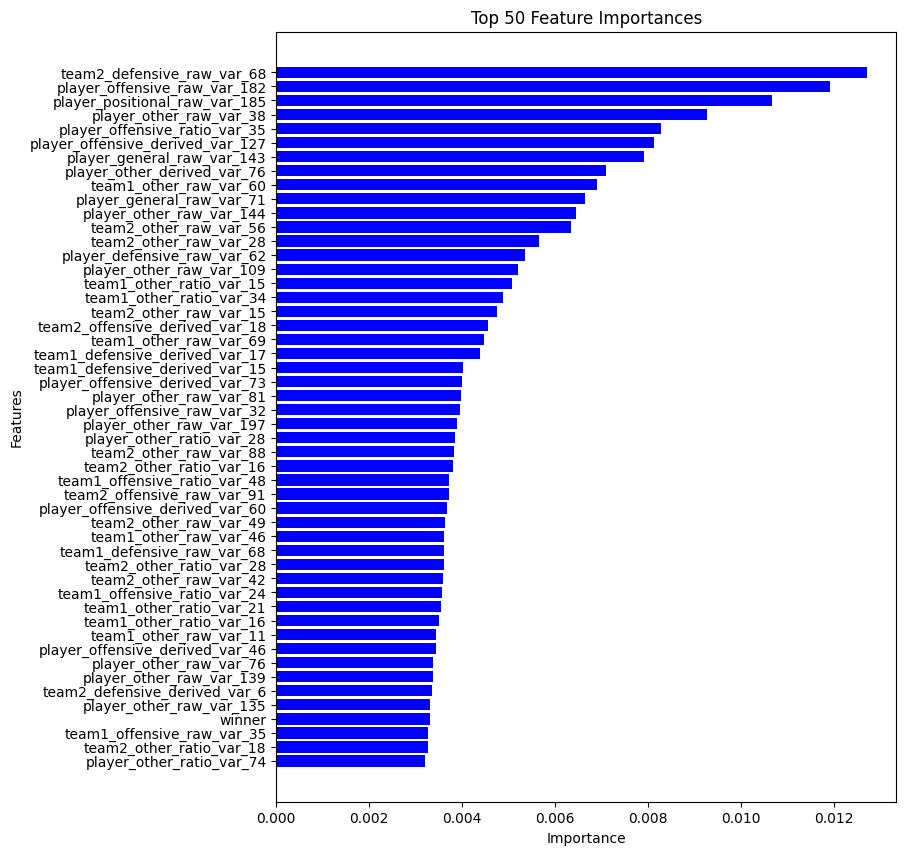

In [ ]:
import matplotlib.pyplot as plt

importance = xgb.feature_importances_
indices = np.argsort(importance)[::-1][:50]
features = x_train.columns[indices]
importance = importance[indices]

plt.figure(figsize=(8, 10))
plt.barh(features, importance, color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 50 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

### LIGHTGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import r2_score

lgbr = lgb.LGBMRegressor(n_estimators = 170)
lgbr.fit(x_train,y_train)

preds_valid = lgbr.predict(x_test)

print('Training Score',r2_score(y_train,lgbr.predict(x_train)))
print()
print('Test Score',r2_score(y_test,lgbr.predict(x_test)))

Training Score 0.6832629003731585

Test Score 0.3215409066935978


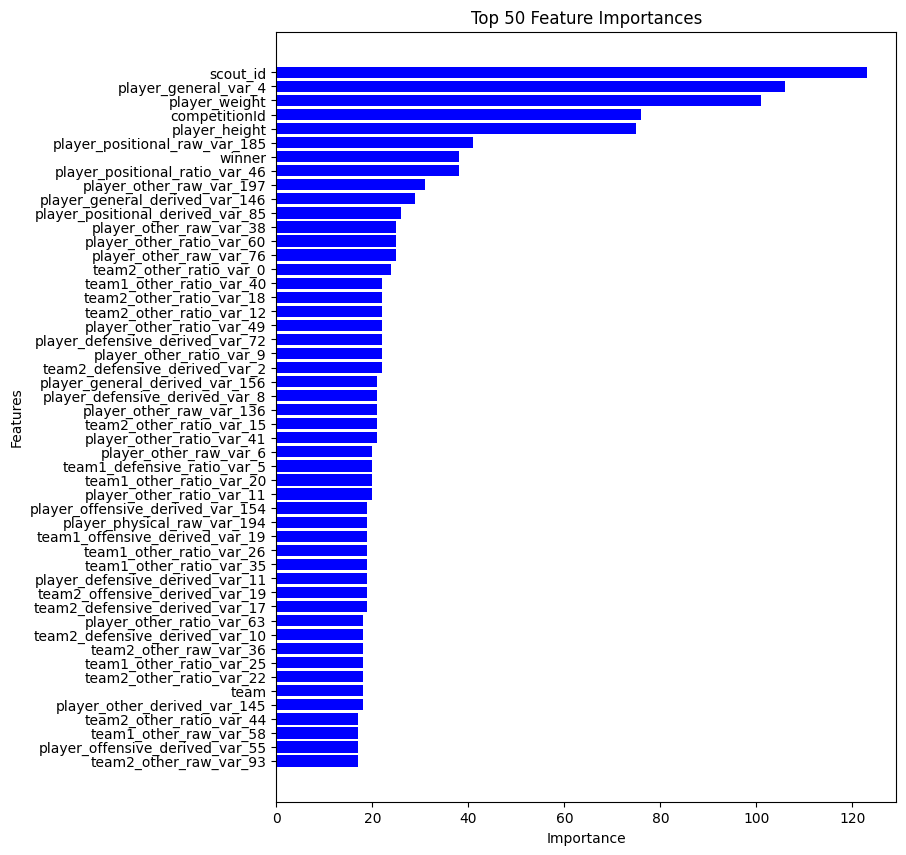

In [ ]:
importance = lgbr.feature_importances_
indices = np.argsort(importance)[::-1][:50]
features = x_train.columns[indices]
importance = importance[indices]

plt.figure(figsize=(8, 10))
plt.barh(features, importance, color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 50 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

### CATBOOST

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cbr = CatBoostRegressor(verbose = False , eval_metric = 'R2',cat_features=cat_feature)
cbr.fit(x_train,y_train)

preds_valid = cbr.predict(x_test)

print('Training Score',r2_score(y_train,cbr.predict(x_train)))
print()
print('Test Score',r2_score(y_test,cbr.predict(x_test)))

Training Score 0.7384293150549432

Test Score 0.3735384728787208


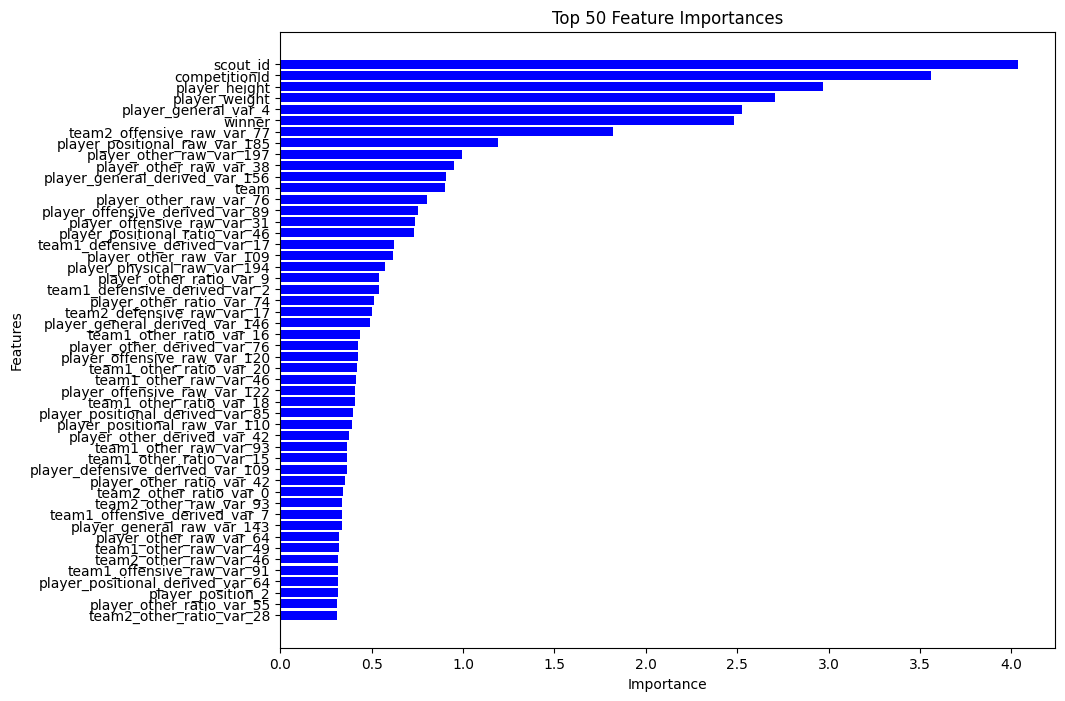

In [ ]:
importance = cbr.get_feature_importance()
indices = np.argsort(importance)[::-1][:50]
features = x_train.columns[indices]
importance = importance[indices]

plt.figure(figsize=(10, 8))
plt.barh(features, importance, color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 50 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.ensemble import StackingRegressor
stk = StackingRegressor([('cbr',CatBoostRegressor(verbose = False , eval_metric = 'R2',cat_features=cat_feature)),
                        ('lgbr',lgb.LGBMRegressor(n_estimators = 170))])
stk.fit(x_train,y_train)

preds_valid = stk.predict(x_test)

print('Training Score',r2_score(y_train,stk.predict(x_train)))
print()
print('Test Score',r2_score(y_test,stk.predict(x_test)))

Training Score 0.7748327535892414

Test Score 0.3810969000687555


# Preprocessing for KNN
Here we are making a new dataset which we use for KNN


In [ ]:
df

,player_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,0,13,2,0,8,7,7,0.317073,0.48,-5.199338,...,0.193658,-1.225943,-1.280981,0.127052,-0.894109,0.347980,-1.554270,0.288962,-0.908119,-0.892038
1,1,16,1,1,8,3,9,0.463415,0.42,-5.199338,...,0.190500,-0.261554,0.330873,0.158931,0.364568,0.468976,-1.041281,0.334962,-0.404825,-0.226489
2,2,4,1,0,5,11,11,0.682927,0.44,-5.199338,...,0.312314,1.494554,-0.261988,-0.286135,1.247505,0.441749,1.674186,0.414288,1.275245,0.793602
3,3,13,1,1,4,17,17,0.682927,0.58,-5.199338,...,0.282556,-0.725529,-0.330873,-0.446875,-0.676925,0.527733,-0.230727,0.423040,-0.748009,-0.713599
4,4,11,0,0,5,10,10,0.731707,0.70,-5.199338,...,0.450453,0.309743,-0.914679,0.702154,1.212751,0.733625,0.494971,0.448360,0.262686,-0.101796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20448,20448,14,0,1,14,7,8,0.439024,0.26,-5.199338,...,0.350022,-0.090452,0.111890,-0.070314,0.016310,0.497442,0.140977,0.424523,-0.005018,0.101796
20449,20449,3,2,1,11,4,4,0.390244,0.32,-5.199338,...,0.362193,1.269657,0.947580,-1.036694,-0.626883,0.264074,1.046828,0.422975,1.406028,1.340200
20450,20450,4,1,0,7,5,5,0.268293,0.30,-5.199338,...,0.341322,1.455299,-0.074087,-0.571253,1.301170,0.869000,2.408550,0.511550,1.097845,0.478025
20451,20451,13,1,0,8,5,5,0.463415,0.46,-5.199338,...,0.215831,0.158697,-0.324254,0.318238,-0.949547,0.322158,-0.021405,0.333229,-0.618059,0.971436


In [ ]:
y = train_df['rating_num']
Y = pd.DataFrame(y)
Y.value_counts()

rating_num
6.0           3654
6.5           3247
7.5           3206
10.0          2442
5.0           2244
7.0           1248
3.5           1077
8.5           1062
9.0           1023
8.0            873
0.0            218
3.0            110
2.0             49
dtype: int64

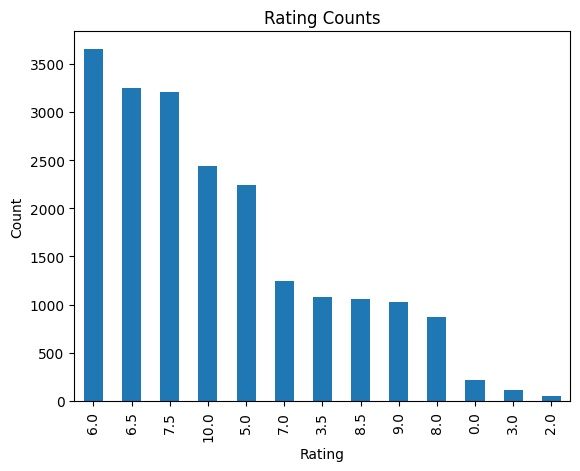

In [ ]:
rating_counts = Y['rating_num'].value_counts()
import matplotlib.pyplot as plt

# plot the value counts as a bar chart
rating_counts.plot(kind='bar')

# add a title and axis labels
plt.title('Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Count')

# show the plot
plt.show()

In [ ]:
y

0        7.0
1        6.5
2        8.5
3        8.0
4        3.5
        ... 
20448    5.0
20449    6.0
20450    5.0
20451    6.0
20452    6.0
Name: rating_num, Length: 20453, dtype: float64

In [ ]:
# Assuming x and y are your dataframes
result_df = pd.concat([x, y], axis=1, join="outer")

# Print the resulting dataframe
result_df.head()

,player_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,...,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19,rating_num
0,0,13,2,0,8,7,7,0.317073,0.48,-5.199338,...,-1.252988,-1.286702,0.124523,-0.877898,0.347980,-1.575692,0.288962,-0.892630,-0.895780,7.0
1,1,16,1,1,8,3,9,0.463415,0.42,-5.199338,...,-0.287898,0.325577,0.158921,0.367678,0.468976,-1.045051,0.334962,-0.394782,-0.217488,6.5
2,2,4,1,0,5,11,11,0.682927,0.44,-5.199338,...,1.497997,-0.252311,-0.295152,1.242061,0.441749,1.674186,0.414288,1.294013,0.785036,8.5
3,3,13,1,1,4,17,17,0.682927,0.58,-5.199338,...,-0.746385,-0.318013,-0.450080,-0.658131,0.527733,-0.233503,0.423040,-0.746367,-0.716839,8.0
4,4,11,0,0,5,10,10,0.731707,0.70,-5.199338,...,0.305796,-0.895780,0.705530,1.199766,0.733625,0.495894,0.448360,0.252311,-0.091712,3.5


In [ ]:
cols= ['winner','team','competitionId', 'scout_id', 'player_weight', 'player_height',
       'player_general_var_4', 'team2_offensive_raw_var_77',
       'player_positional_raw_var_185', 'player_other_raw_var_197',
       'player_other_raw_var_38', 'player_other_raw_var_76',
       'player_general_derived_var_156', 'player_offensive_derived_var_89',
       'player_offensive_raw_var_31', 'player_positional_ratio_var_46',
       'team2_defensive_raw_var_17', 'player_other_raw_var_109',
       'player_physical_raw_var_194', 'team1_defensive_derived_var_17',
       'team1_defensive_derived_var_2', 'team1_other_raw_var_46',
       'player_other_ratio_var_9', 'player_other_ratio_var_74',
       'player_positional_derived_var_85', 'player_other_raw_var_64',
       'team1_other_ratio_var_15', 'player_other_derived_var_76',
       'team1_other_ratio_var_16', 'player_other_ratio_var_55',
       'team2_other_raw_var_93', 'team1_offensive_raw_var_1',
       'player_general_derived_var_146', 'player_other_derived_var_42',
       'player_positional_raw_var_110', 'player_general_raw_var_143',
       'player_other_ratio_var_42', 'player_defensive_derived_var_109',
       'team1_other_ratio_var_18', 'team2_other_raw_var_36',
       'team1_other_ratio_var_21', 'team1_other_ratio_var_20',
       'player_position_2', 'team1_other_ratio_var_0',
       'team1_defensive_raw_var_17', 'team1_other_raw_var_45',
       'player_other_raw_var_139', 'team2_offensive_derived_var_19',
       'team2_other_raw_var_49', 'team1_other_raw_var_47','rating_num']



new_df = result_df.loc[:, cols]

In [ ]:
new_df

,winner,team,competitionId,scout_id,player_weight,player_height,player_general_var_4,team2_offensive_raw_var_77,player_positional_raw_var_185,player_other_raw_var_197,...,team1_other_ratio_var_20,player_position_2,team1_other_ratio_var_0,team1_defensive_raw_var_17,team1_other_raw_var_45,player_other_raw_var_139,team2_offensive_derived_var_19,team2_other_raw_var_49,team1_other_raw_var_47,rating_num
0,2,0,8,13,0.48,0.317073,0.017565,303,0.281046,0.763158,...,0.406639,7,0.100000,167,0.178571,0.062500,-0.895780,0.310000,0.437086,7.0
1,1,1,8,16,0.42,0.463415,-0.226489,462,0.076253,0.355263,...,0.319502,9,0.278000,161,0.035714,0.000000,-0.217488,0.330000,0.201325,6.5
2,1,0,5,4,0.44,0.682927,-0.487893,719,0.058824,0.532895,...,0.448133,11,0.304000,139,0.107143,0.250000,0.785036,0.420000,0.185430,8.5
3,1,1,4,13,0.58,0.682927,-5.199338,366,0.004357,0.561718,...,0.493776,17,0.263000,148,0.035714,0.000000,-0.716839,0.390000,0.312583,8.0
4,0,0,5,11,0.70,0.731707,1.312981,508,0.102397,0.592105,...,0.319502,10,0.429000,33,0.071429,0.000000,-0.091712,0.610000,0.234437,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20448,0,1,14,14,0.26,0.439024,-0.761353,451,0.150990,0.561718,...,0.349242,8,0.344758,129,0.202176,0.026787,0.103057,0.358109,0.310727,5.0
20449,2,1,11,3,0.32,0.390244,0.072829,614,0.176471,0.561718,...,0.568465,4,0.250000,164,0.071429,0.000000,1.337127,0.280000,0.335099,6.0
20450,1,0,7,4,0.30,0.268293,0.376283,631,0.026144,0.447368,...,0.066390,5,0.188000,53,0.071429,0.000000,0.475214,0.350000,0.256954,5.0
20451,1,0,8,13,0.46,0.463415,1.072973,374,0.095861,0.651316,...,0.286307,5,0.375000,152,0.071429,0.000000,0.967422,0.270000,0.435762,6.0


In [ ]:
drive.mount('/content/drive/')
path = "/content/drive/My Drive/ML_Data/new_df.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  new_df.to_csv(f)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
